<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/Q4_Mini_project_Group_1_Anays_Garcia%2C_Martha_Requena_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import necessary libraries for data processing and numerical calculations
import numpy as np  # For numerical calculations
import pandas as pd  # For handling datasets

# Import visualization libraries
import matplotlib.pyplot as plt  # For data visualization

# Import dataset library
from sklearn import datasets  # For loading sample datasets

# Import model selection and evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV  # For model training, validation, and hyperparameter tuning
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# Import machine learning models - Regression
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.tree import DecisionTreeRegressor  # Decision tree regression model
from sklearn import tree  # For visualizing decision trees
# Explicitly import plot_tree function
from sklearn.tree import plot_tree
from sklearn.preprocessing import PolynomialFeatures  # Creating polynomial features
from sklearn.pipeline import Pipeline  # Automating preprocessing + modeling
from sklearn.preprocessing import StandardScaler # Used to center or standardize the desised variable(s)

# Import ensemble learning models - Forest-based
from sklearn.ensemble import RandomForestRegressor  # Random forest regression model
from sklearn.ensemble import ExtraTreesRegressor  # Extremely Randomized Trees for regression

# Import ensemble learning models - Boosting
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting regression model
from sklearn.ensemble import AdaBoostRegressor  # AdaBoost regression model
from sklearn.ensemble import BaggingRegressor  # Bagging regression model

# - **Orange Dataset** (CSV file from Canvas) → Used for Question 4.

### Stat approach

Evaluate the performance of the equation only on the training data, but make sure to adjust the evaluation for overfitting.

How to adjust for overfitting?

Use adjusted R squared, Residuals Standard Error (RSE), Cp, BIC, ... (or any metric that adjusts for overfitting).

# ## Question 4 (15 points): Predicting Tree Age from Circumference

# **Instructions:**
# - Load the **Orange dataset**.
# - Train at least **three regression models**.
# - Use **Adjusted R²** to select the best model.
# - Propose the best regression equation for predicting tree age.


Stat approach
Evaluate the performance of the equation only on the training data, but make sure to adjust the evaluation for overfitting.

How to adjust for overfitting?

Use adjusted R squared, Residuals Standard Error (RSE), Cp, BIC, ... (or any metric that adjusts for overfitting).

### **Step 1: Load & Explore the Orange Dataset**
✅ **Load the Orange dataset**  
✅ **Display sample data to understand its structure**  
✅ **Identify the outcome variable (`Tree Age`) and predictor (`Circumference`)**  
✅ **Visualize the relationship between `Circumference` and `Tree Age` using scatter plots**  

---

In [21]:
url= 'https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/Orange.csv'

In [22]:
orange_tree_df = pd.read_csv(url)

In [23]:
orange_tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            35 non-null     int64
 1   circumference  35 non-null     int64
dtypes: int64(2)
memory usage: 692.0 bytes


In [24]:
x = orange_tree_df[['circumference']]
y = orange_tree_df['age']

In [25]:
orange_tree_df[["circumference",'age']].corr()

,circumference,age
circumference,1.000000,0.913519
age,0.913519,1.000000


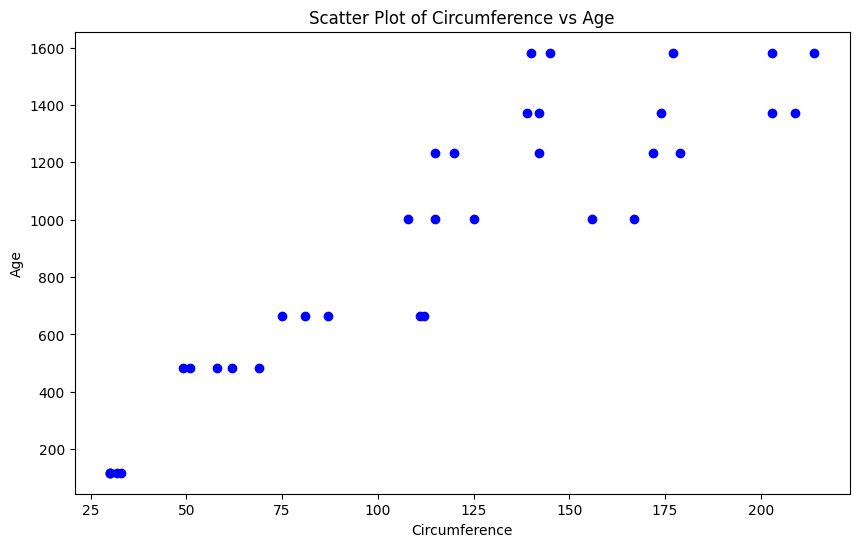

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c= 'blue')
plt.xlabel('Circumference')
plt.ylabel('Age')
plt.title('Scatter Plot of Circumference vs Age')
plt.show()

In [27]:
print(np.array(orange_tree_df ['age']).reshape(-1,1).ndim)
print(np.array(orange_tree_df ['age']).reshape(-1,1).shape)

2
(35, 1)


In [28]:
x_circu = np.array(orange_tree_df ['circumference']).reshape(-1,1)
y_age = np.array(orange_tree_df ['age']).reshape(-1,1)

---
# **Linear regression**
---

In [29]:
lr_orange_circ = LinearRegression()
lr_orange_circ.fit(x_circu, y_age)

LinearRegression()

In [30]:
lr_orange_circ.coef_


array([[7.81599844]])

In [31]:
lr_orange_circ.intercept_

array([16.60360886])

In [32]:
y_pred_circ = lr_orange_circ.predict(x_circu)

In [37]:
r2 = r2_score(y_age, y_pred_circ)
r2


0.8345166945883684

In [35]:
def rse_calculator(y_actual, y_predicted, p):

    # Compute the sum of squared residuals (errors)
    residual_sum = np.sum((y_actual - y_predicted) ** 2)

    # Compute the RSE using the formula: sqrt(SSE / (n - p - 1))
    rse_value = np.sqrt(residual_sum / (y_actual.size - p - 1))

    # Return the RSE value rounded to 4 decimal places
    return np.round(rse_value, 4)

In [36]:
rse_calculator(y_age, y_pred_circ, 1) / np.mean(y_age)

0.2202453756777692

**R² Score (0.8345) Interpretation:**
   - The model explains approximately **83.45% of the variance** in the actual data.
   - This indicates a **good fit**, though some variance remains unexplained.

**Relative Standard Error (RSE):**
   - The RSE value divided by the mean (0.2202) suggests that the typical prediction error is about **22.02% of the average actual value**.
   - While this is relatively low, it still suggests some **room for model improvement**.

In [38]:
intercept = lr_orange_circ.intercept_.item()
slope = lr_orange_circ.coef_.item()

# Print regression equation
print(f"Regression Equation: Age = {intercept:.4f} + {slope:.4f} * Circumference")

Regression Equation: Age = 16.6036 + 7.8160 * Circumference


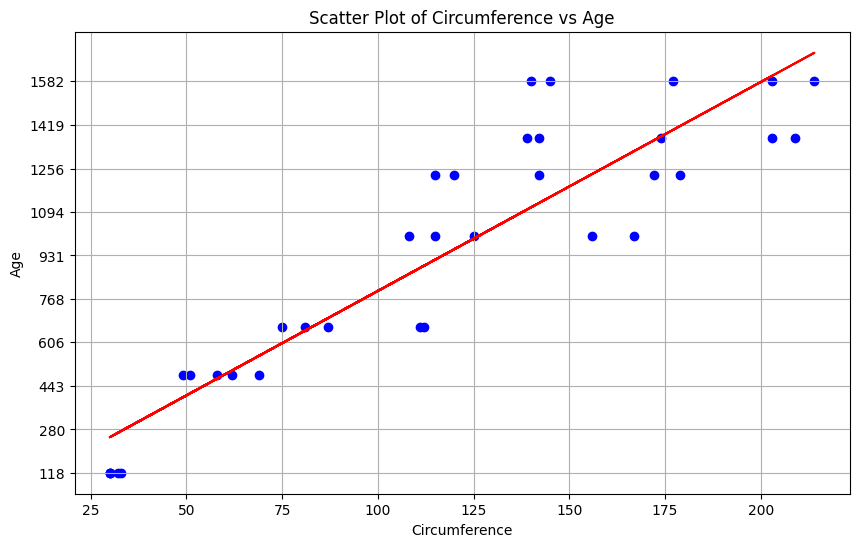

In [39]:
plt.figure(figsize=(10, 6))

# Scatter plot (Age vs Circumference)
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c='blue')

# Proper axis labels
plt.xlabel('Circumference')
plt.ylabel('Age')

# Title
plt.title('Scatter Plot of Circumference vs Age')

# Correct yticks range and formatting
plt.yticks(np.linspace(orange_tree_df['age'].min(), orange_tree_df['age'].max(), num=10).astype(int))

# Plot the regression line
plt.plot(orange_tree_df['circumference'], y_pred_circ, c='red', linestyle='-')  # Red solid line for regression

# Enable grid
plt.grid(True)

# Show plot
plt.show()


In [40]:
residuals_circ = y_age - y_pred_circ

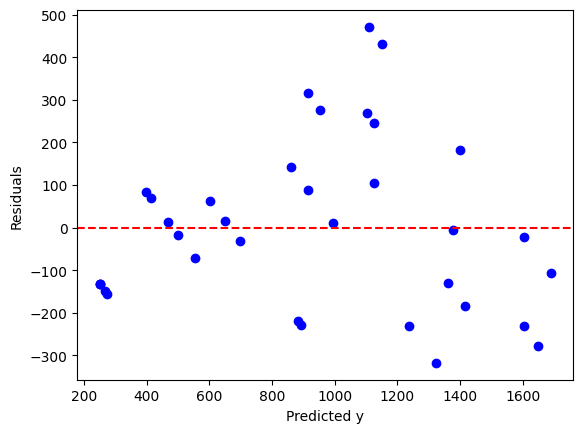

In [41]:
plt.scatter(y_pred_circ, residuals_circ,c='blue')

plt.xlabel("Predicted y")
plt.ylabel("Residuals")  # Difference between actual and predicted values
plt.axhline(0, c='red', ls='--')

plt.show()

In [42]:
rse_circ= rse_calculator(y_age, y_pred_circ, x_circu.shape[1])
rse_circ

203.0977

The residual plot shows no strong bias, but potential heteroscedasticity and outliers. The model may not fully capture some patterns, suggesting a need for further refinement or a different model.

---
# **Polynomial Regression**
---

In [43]:
# Initialize a polynomial transformer with degree 2
poly2_object = PolynomialFeatures(degree=2)

# Convert 'circumference' column into a NumPy array and reshape it for transformation
x_circu = np.array(orange_tree_df['circumference']).reshape(-1, 1)

# Define the target variable (MPG)
y_age = orange_tree_df['age']

In [44]:
orange_tree_df['circumference'].corr(orange_tree_df['circumference']**2)

0.9750843342791654

In [45]:
# Pipeline with two steps: centering and polynomial feature transformation
poly2_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=False)),  # Step 1: Center the predictor. We do with_std=False bc we want to center only, not standardize
    ('poly_features', PolynomialFeatures(degree=2))  # Step 2: Apply polynomial transformation
])

In [73]:
x_circu_transf_poly2 = poly2_pipeline.fit_transform(x_circu)


In [47]:
lr_poly2 = LinearRegression()
lr_poly2.fit(x_circu_transf_poly2, y_age)

LinearRegression()

In [48]:
lr_poly2.intercept_

1029.9289983719384

In [49]:
lr_poly2.coef_

array([ 0.        ,  7.81603133, -0.03357337])

In [50]:
intercept = lr_poly2.intercept_
coefficients = lr_poly2.coef_[1:]

In [51]:
feature_names = ['Intercept'] + ['Coeff_degree_'+ str(i) for i in range(1, len(coefficients)+1)]

coefficients_df = pd.DataFrame({'Coefficient Name': feature_names, 'Coefficient Value': np.concatenate(([intercept], coefficients))})

print(coefficients_df)

  Coefficient Name  Coefficient Value
0        Intercept        1029.928998
1   Coeff_degree_1           7.816031
2   Coeff_degree_2          -0.033573


In [52]:
# Example DataFrame with coefficients
coefficients_df = pd.DataFrame({
    "Coefficient Name": ["Intercept", "Coeff_degree_1", "Coeff_degree_2"],
    "Coefficient Value": [1029.928998, 7.816031, -0.033573]
})

# Extracting values dynamically
intercept = coefficients_df.loc[coefficients_df["Coefficient Name"] == "Intercept", "Coefficient Value"].values[0]
coeff_1 = coefficients_df.loc[coefficients_df["Coefficient Name"] == "Coeff_degree_1", "Coefficient Value"].values[0]
coeff_2 = coefficients_df.loc[coefficients_df["Coefficient Name"] == "Coeff_degree_2", "Coefficient Value"].values[0]

# Variable name
variable = "centered circumference"

# Dynamically construct the regression equation
equation = f"Predicted mpg = {intercept:.2f} {coeff_1:+.2f} * ({variable}) {coeff_2:+.3f} * ({variable} squared)"

print(equation)


Predicted mpg = 1029.93 +7.82 * (centered circumference) -0.034 * (centered circumference squared)


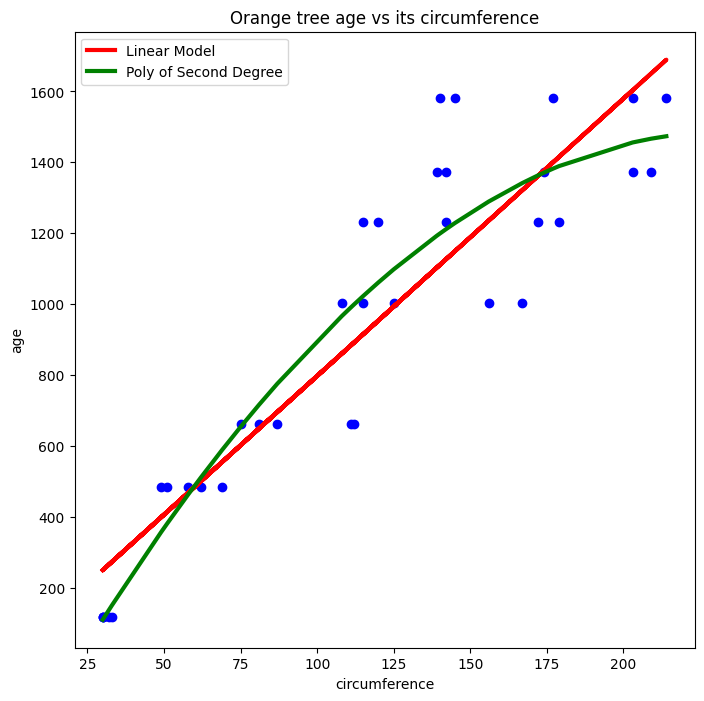

In [53]:
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c='blue')
plt.xlabel("circumference")
plt.ylabel("age")
plt.title("Orange tree age vs its circumference")

# Linear regression line
linear_model = LinearRegression().fit(x_circu, y_age)
linear_predictions = linear_model.predict(x_circu)
plt.plot(x_circu, linear_predictions, c='red', ls='-', linewidth=3, label='Linear Model')

# Create xaxis_values (these are sorted x values)
xaxis_values = orange_tree_df['circumference'].sort_values().values.reshape(-1, 1)

# Transform the xaxis_values using the pipeline
xaxis_values_transf_poly2 = poly2_pipeline.fit_transform(xaxis_values)

# Second degree poly curve
poly_predictions = lr_poly2.predict(xaxis_values_transf_poly2)
plt.plot(xaxis_values, poly_predictions, c='green', ls='-', linewidth=3, label='Poly of Second Degree')

plt.legend()
plt.show()



In [54]:
# Calculate the mean (average) circumference of all vehicles in the dataset
mean_circumference = orange_tree_df['circumference'].mean()

# Calculate the maximum circumference value in the dataset
max_circumference = orange_tree_df['circumference'].max()

# Print the calculated mean circumference
print("Mean circumference:", mean_circumference)

# Print the maximum circumference value
print("Max circumference:", max_circumference)



Mean circumference: 115.85714285714286
Max circumference: 214


In [55]:
np.random.seed(1)
X_age_new = np.random.randint(116, 214, 5).reshape(-1, 1)  # New random circumference values
X_age_new

array([[153],
       [128],
       [188],
       [125],
       [191]])

In [56]:

X_age_new_transformed = poly2_pipeline.fit_transform(X_age_new)

In [57]:

y_pred_poly2_age = lr_poly2.predict(X_age_new_transformed)

# Display predictions
print("Predicted Age for New Circumference Values:")
print(pd.DataFrame({'Circumference': X_age_new.flatten(), 'Predicted Age': y_pred_poly2_age.round(2)}))

Predicted Age for New Circumference Values:
   Circumference  Predicted Age
0            153         998.13
1            128         775.03
2            188        1239.96
3            125         745.44
4            191        1256.86


In [58]:

y_pred_poly2_tr_age = lr_poly2.predict(x_circu_transf_poly2)

In [59]:
# Function to calculate adjusted R-squared
def adj_r2_calculator(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [60]:
# Compute R² value for the polynomial regression model
r2_value_poly2_circ = r2_score(y_age, y_pred_poly2_tr_age)

In [61]:
# Compute Adjusted R² value (accounting for number of predictors)
adj_r2_value = adj_r2_calculator(r2_value_poly2_circ, n=orange_tree_df.shape[0], p=2)

In [62]:
# Print results
print(f"R² (Polynomial of Second Degree): {r2_value_poly2_circ:.4f}")
print(f"Adjusted R² Value 2nd degree: {adj_r2_value:.4f}")

R² (Polynomial of Second Degree): 0.8773
Adjusted R² Value 2nd degree: 0.8696


In [63]:
# Compute Residual Standard Error (RSE) using actual vs. predicted values with 2 predictors
rse_calculator (y_age, y_pred_poly2_tr_age, p = 2)


177.591

#Train a Third-Degree Polynomial Regression Model

In [64]:
# Create a pipeline for polynomial feature transformation (degree 3) with feature centering
poly3_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=False)),  # Center data without scaling variance
    ('poly_features', PolynomialFeatures(degree=3))  # Generate polynomial features up to degree 3
])


In [65]:
x_circu_transf_poly3 = poly3_pipeline.fit_transform(x_circu)
x_circu_transf_poly3

array([[ 1.00000000e+00, -8.58571429e+01,  7.37144898e+03,
        -6.32891548e+05],
       [ 1.00000000e+00, -5.78571429e+01,  3.34744898e+03,
        -1.93673834e+05],
       [ 1.00000000e+00, -2.88571429e+01,  8.32734694e+02,
        -2.40303440e+04],
       [ 1.00000000e+00, -8.57142857e-01,  7.34693878e-01,
        -6.29737609e-01],
       [ 1.00000000e+00,  4.14285714e+00,  1.71632653e+01,
         7.11049563e+01],
       [ 1.00000000e+00,  2.61428571e+01,  6.83448980e+02,
         1.78673090e+04],
       [ 1.00000000e+00,  2.91428571e+01,  8.49306122e+02,
         2.47512070e+04],
       [ 1.00000000e+00, -8.28571429e+01,  6.86530612e+03,
        -5.68839650e+05],
       [ 1.00000000e+00, -4.68571429e+01,  2.19559184e+03,
        -1.02879160e+05],
       [ 1.00000000e+00, -4.85714286e+00,  2.35918367e+01,
        -1.14588921e+02],
       [ 1.00000000e+00,  4.01428571e+01,  1.61144898e+03,
         6.46881662e+04],
       [ 1.00000000e+00,  5.61428571e+01,  3.15202041e+03,
      

In [66]:
lr_poly3 = LinearRegression()
lr_poly3.fit(x_circu_transf_poly3, y_age)

LinearRegression()

In [67]:
# Transform the data through the pipeline

x_circu_transf_poly3 = poly3_pipeline.fit_transform(x_circu)

In [68]:
# Train the cubic polynomial regression model
lr_poly3 = LinearRegression().fit(x_circu_transf_poly3, y_age)

In [69]:
# Extract model coefficients
intercept = lr_poly3.intercept_
coefficients = lr_poly3.coef_[1:]  # Skip the first zero value

# Create coefficient names
feature_names = ['Intercept'] + [f'Coeff_degree_{i}' for i in range(1, len(coefficients) + 1)]

# Store coefficients in a DataFrame
coefficients_df = pd.DataFrame({'Coefficient Name': feature_names, 'Coefficient Value': np.concatenate(([intercept], coefficients))})

# Display coefficient values
print(coefficients_df)

  Coefficient Name  Coefficient Value
0        Intercept        1027.710230
1   Coeff_degree_1           8.163864
2   Coeff_degree_2          -0.032882
3   Coeff_degree_3          -0.000058


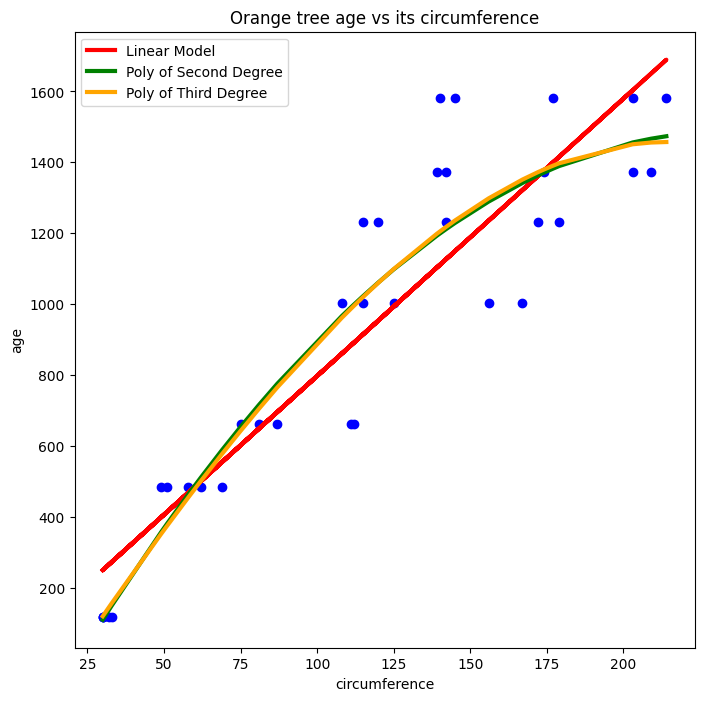

In [70]:
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c='blue')
plt.xlabel("circumference")
plt.ylabel("age")
plt.title("Orange tree age vs its circumference")

# Linear regression line
linear_model = LinearRegression().fit(x_circu, y_age)
linear_predictions = linear_model.predict(x_circu)
plt.plot(x_circu, linear_predictions, c='red', ls='-', linewidth=3, label='Linear Model')

# Create xaxis_values (these are sorted x values)
xaxis_values = orange_tree_df['circumference'].sort_values().values.reshape(-1, 1)

# Transform the xaxis_values using the pipeline
xaxis_values_transf_poly2 = poly2_pipeline.fit_transform(xaxis_values)

# Second degree poly curve
poly_predictions = lr_poly2.predict(xaxis_values_transf_poly2)
plt.plot(xaxis_values, poly_predictions, c='green', ls='-', linewidth=3, label='Poly of Second Degree')


# Transform the xaxis_values using the pipeline
xaxis_values_transf_poly3 = poly3_pipeline.fit_transform(xaxis_values)

# Third degree poly curve
poly_predictions_poly3 = lr_poly3.predict(xaxis_values_transf_poly3)
plt.plot(xaxis_values, poly_predictions_poly3, c='orange', ls='-', linewidth=3, label='Poly of Third Degree')


plt.legend()
plt.show()



In [71]:
# Make predictions using the trained polynomial regression model (degree 3)
y_pred_poly3 = lr_poly3.predict(x_circu_transf_poly3)

# Compute R-squared (R²) value to measure how well the model explains variance in the data
r2_value_poly3 = r2_score(y_age, y_pred_poly3)

# Calculate Adjusted R-squared, which accounts for the number of predictors (p=3) and sample size (n)
adj_r2_calculator(r2_value_poly3, n=orange_tree_df.shape[0], p=3)


0.8657353242789765

In [72]:
# Compute Residual Standard Error (RSE) to measure the standard deviation of residuals,
# adjusting for the number of predictors (p=3)
rse_calculator(y_age, y_pred_poly3, p=3)


180.2297

3rd degree polynomial is worst that the second dgree  polynomial so we should stay with 2nd degree polynomial

# Regression Tree

In [75]:
reg_tree_ = DecisionTreeRegressor(min_samples_leaf=0.1,random_state=1)

In [76]:
reg_tree_.fit(x_circu, y_age)

DecisionTreeRegressor(min_samples_leaf=0.1, random_state=1)

In [77]:
y_pred_tree = reg_tree_.predict(x_circu)

In [78]:
r2_tree = r2_score(y_age, y_pred_tree)
r2_tree

0.9451533074294426

In [79]:
leaves_tree = reg_tree_.get_n_leaves()
leaves_tree

7

In [81]:
p_for_tree = leaves_tree - 1

In [82]:
adj_r2_value_tree = adj_r2_calculator(r2_tree, n=orange_tree_df.shape[0], p=p_for_tree)
adj_r2_value_tree

0.9334004447357517

In [84]:
# Print the results with an explanation
print(f"R-squared (R²) for Regression Tree: {r2_tree:.4f}")
print(f"Adjusted R²: {adj_r2_value_tree:.4f}")

# Explanation of the results
print("\n📌 Interpretation:")
print(f"- R² = {r2_tree:.4f} means that {r2_tree * 100:.2f}% of the variation in home prices ('medv') is explained by 'lstat' using a Regression Tree.")
print("- The Regression Tree captures non-linear relationships better than Linear and Polynomial Regression.")
print(f"- The tree has {leaves_tree} leaves, meaning the data was split into {leaves_tree} segments.")
print("- This allows the model to better fit the data, especially if relationships are complex.")
print("- However, if the tree is too deep, it may overfit, so we need to compare results carefully.")


R-squared (R²) for Regression Tree: 0.9452
Adjusted R²: 0.9334

📌 Interpretation:
- R² = 0.9452 means that 94.52% of the variation in home prices ('medv') is explained by 'lstat' using a Regression Tree.
- The Regression Tree captures non-linear relationships better than Linear and Polynomial Regression.
- The tree has 7 leaves, meaning the data was split into 7 segments.
- This allows the model to better fit the data, especially if relationships are complex.
- However, if the tree is too deep, it may overfit, so we need to compare results carefully.


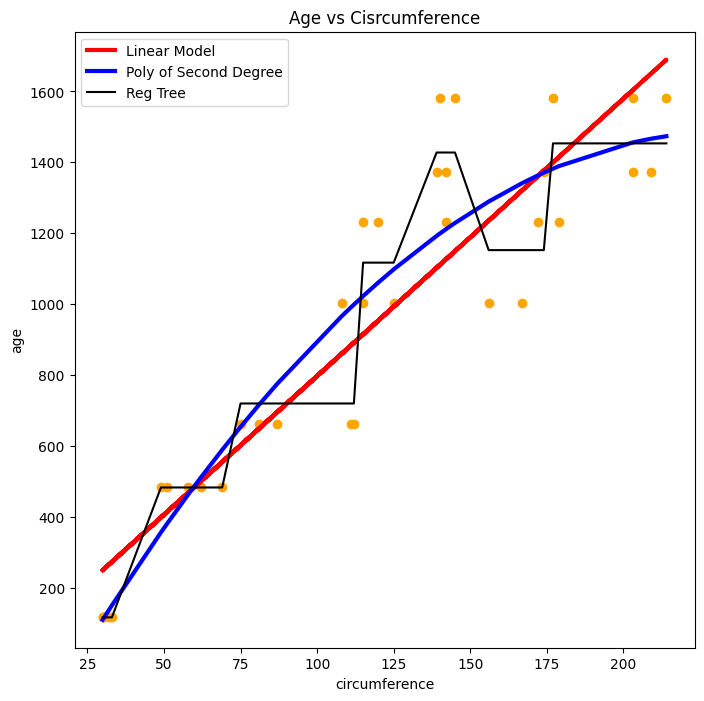

In [90]:
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c='orange')
plt.xlabel("circumference")
plt.ylabel("age")
plt.title("Age vs Cisrcumference")

# Linear Regression line
plt.plot(x_circu, y_pred_circ, c='red', ls='-', linewidth= 3, label='Linear Model')

# Create xaxis_values
xaxis_values = orange_tree_df['circumference'].sort_values().values.reshape(-1, 1)

# Second degree poly curve
xaxis_values__transf_poly2 = poly2_pipeline.fit_transform(xaxis_values)
poly_predictions = lr_poly2.predict(xaxis_values__transf_poly2)
plt.plot(xaxis_values, poly_predictions, c='blue', ls='-', linewidth=3, label='Poly of Second Degree')

# Tree
y_predicted_tree= reg_tree_.predict (xaxis_values)
plt.plot(xaxis_values, y_predicted_tree, c='black', ls='-', label='Reg Tree')

plt.legend()
plt.show()

# **Post-Pruning via CCP**

In [91]:
reg_tree_unpruned = DecisionTreeRegressor(random_state=1)
reg_tree_unpruned.fit(x_circu, y_age)

DecisionTreeRegressor(random_state=1)

In [92]:
ccp_path = reg_tree_unpruned.cost_complexity_pruning_path(x_circu, y_age)

In [93]:
ccp_alphas = ccp_path['ccp_alphas']

In [94]:
# Extract alpha values to test for pruning
hyperparam_grid_alpha = {'ccp_alpha': ccp_path['ccp_alphas']}

In [96]:
# Set up cross-validation with 10 splits
cv_set_up = KFold(n_splits=5, shuffle=True, random_state=1)

In [97]:
# Perform Grid Search CV to find the optimal pruning alpha (ccp_alpha)
grid_search_setting_alpha = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=1),  # Decision tree model with a fixed random state for reproducibility
    param_grid=hyperparam_grid_alpha,  # Dictionary of alpha values (ccp_alpha) to be tested
    cv=cv_set_up,  # Cross-validation setting (e.g., number of folds)
    scoring='neg_mean_squared_error'  # Use negative MSE as the scoring metric (lower MSE is better)
)


In [108]:
# Train using Grid Search CV
grid_search_setting_alpha.fit(x_circu, y_age)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'ccp_alpha': array([     0.        ,    210.        ,    245.37619048,    284.01428571,
          420.        ,    490.75238095,    630.        ,    864.60428571,
          974.67857143,   1376.19047619,   2528.75      ,   3527.31261905,
         4364.5021645 ,   5514.97634085,  24073.79545455, 181120.52658432])},
             scoring='neg_mean_squared_error')

In [109]:
# Retrieve the best alpha value
best_alpha = grid_search_setting_alpha.best_params_['ccp_alpha']
print("Best pruning alpha:", best_alpha)

Best pruning alpha: 2528.75


In [112]:
# Create a pruned Decision Tree Regressor using the best-found ccp_alpha value from grid search
reg_tree_postp = DecisionTreeRegressor(
    random_state=1,
    ccp_alpha=grid_search_setting_alpha.best_params_['ccp_alpha']  # Optimal pruning parameter from grid search
)

# Display the configured Decision Tree model
reg_tree_postp


DecisionTreeRegressor(ccp_alpha=2528.75, random_state=1)

In [113]:
# Train a new pruned Decision Tree
reg_tree_postp = DecisionTreeRegressor(random_state=1, ccp_alpha=best_alpha)
reg_tree_postp.fit(x_circu, y_age)

DecisionTreeRegressor(ccp_alpha=2528.75, random_state=1)

In [114]:
# Make predictions with the pruned model
y_pred_test_tree_postp = reg_tree_postp.predict(x_circu)

In [115]:
# Calculate RMSE for the pruned model
test_rmse_postp = root_mean_squared_error(y_age, y_pred_test_tree_postp)
print(f"Test RMSE (Pruned Tree): {test_rmse_postp:.4f}")

Test RMSE (Pruned Tree): 113.5341


In [126]:
# Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial (2nd Degree)", "Polynomial (3rd Degree)",
              "Unpruned Decision Tree", "Pruned Decision Tree"],
    "R²": [r2_value, r2_value_poly2, r2_value_poly3, r2_tree, r2_pruned],
    "Adjusted R²": [adj_r2_value, adj_r2_poly2, adj_r2_poly3, adj_r2_value_tree, adj_r2_pruned],
    "RMSE": [rmse_linear, rmse_poly2, rmse_poly3, test_rmse_unpruned, test_rmse_postp]
})

# Print the DataFrame
print(model_comparison)


                     Model        R²  Adjusted R²        RMSE
0        Linear Regression  0.834517     0.829502  197.209592
1  Polynomial (2nd Degree)  0.877306     0.869638  169.809482
2  Polynomial (3rd Degree)  0.877582     0.865735  169.618498
3   Unpruned Decision Tree  0.945153     0.933400  113.534058
4     Pruned Decision Tree  0.945153     0.933400  113.534058


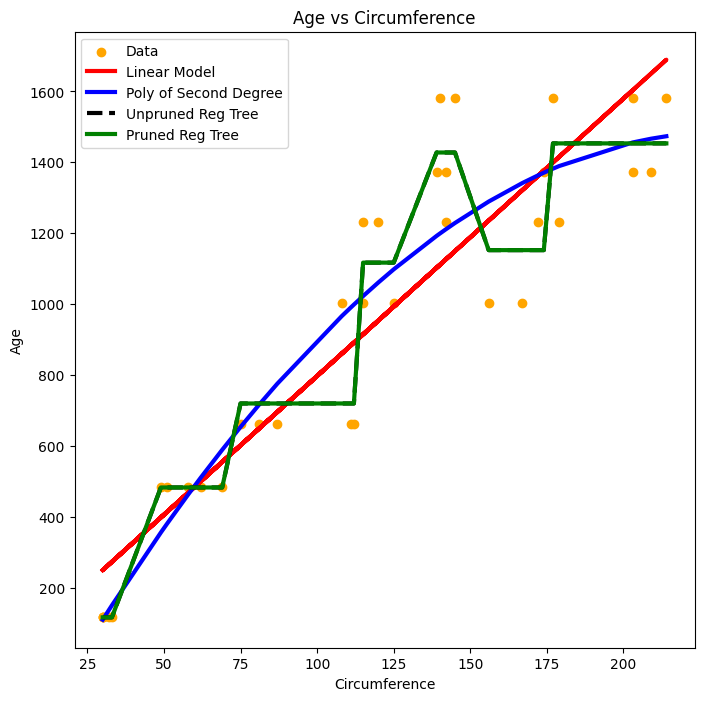

In [118]:
# Scatter plot of original data points
plt.figure(figsize=(8, 8))
plt.scatter(orange_tree_df['circumference'], orange_tree_df['age'], c='orange', label="Data")

# Linear Regression
plt.plot(x_circu, y_pred_circ, c='red', ls='-', linewidth=3, label='Linear Model')

# Polynomial Regression (2nd Degree)
xaxis_values = orange_tree_df['circumference'].sort_values().values.reshape(-1, 1)
xaxis_values_transf_poly2 = poly2_pipeline.fit_transform(xaxis_values)
poly_predictions = lr_poly2.predict(xaxis_values_transf_poly2)
plt.plot(xaxis_values, poly_predictions, c='blue', ls='-', linewidth=3, label='Poly of Second Degree')

# Unpruned Decision Tree
y_predicted_tree_unpruned = reg_tree_.predict(xaxis_values)
plt.plot(xaxis_values, y_predicted_tree_unpruned, c='black', linestyle='dashed', linewidth=3, label='Unpruned Reg Tree')

# Pruned Decision Tree
y_predicted_tree_pruned = reg_tree_postp.predict(xaxis_values)
plt.plot(xaxis_values, y_predicted_tree_pruned, c='green', linestyle='-', linewidth=3, label='Pruned Reg Tree')

# Labels and Title
plt.xlabel("Circumference")
plt.ylabel("Age")
plt.title("Age vs Circumference")

# Add Legend
plt.legend()
plt.show()
